In [1]:
from generate_paths import get_all_files
import six.moves.cPickle as pickle
import numpy as np
import copy
from joblib import Parallel, delayed

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [4]:
from hmmlearn import hmm

In [5]:
feat_name = 'sections_start'

In [28]:
features = []
with open(feat_name+'.pkl', 'rb') as pickle_file:
    try:
       for _ in range(500000):
            entry = pickle.load(pickle_file, encoding='bytes', fix_imports=True)
            features.append(entry)
    except EOFError:
        pass

In [29]:
data = map(lambda x: x[1], features)
data = list(filter(lambda x: 'year' in x and x['year']>=1965, data))
len(data)

247418

In [37]:
for entry in data:
    entry['sections_gap'] = np.diff(entry[feat_name])
data = list(filter(lambda x: len(x['sections_gap'])>=0, data))
len(data)

247418

In [31]:
granularity = 5
labels = list(map(lambda x: x['year'], data))
labels -= min(labels)
labels = np.array(list(map(int, labels)))
classes = list(map(lambda x: x//granularity, labels))

In [27]:
classes_to_data = {}
for i,entry in enumerate(data):
    cls = classes[i]
    classes_to_data.setdefault(cls, []).append(entry)
for cls in classes_to_data:
    classes_to_data[cls] = np.random.permutation(classes_to_data[cls])
min_len = min([len(x) for x in classes_to_data.values()])
uniform_data = np.array([subdata[:min_len] for subdata in classes_to_data.values()]).flatten()
data = uniform_data
len(data)

6560

In [26]:
BASELINE = 33.95
np.mean((labels-BASELINE)**2)

95.283019202321569

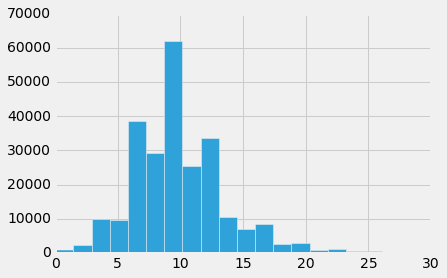

In [34]:
num_sections = np.array(list(map(lambda x: len(x[feat_name]), data)))
plt.hist(num_sections[num_sections < 30], 20);

0


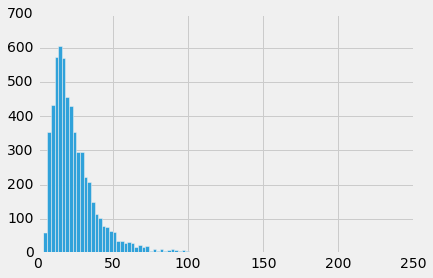

1


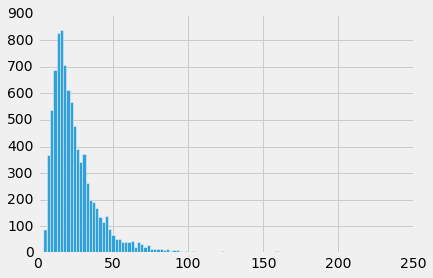

2


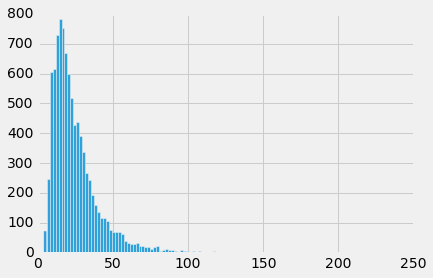

3


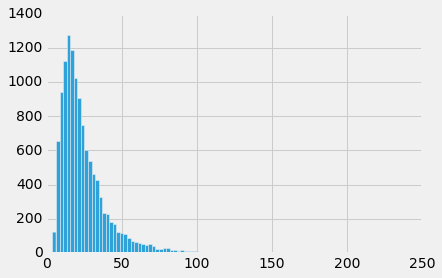

4


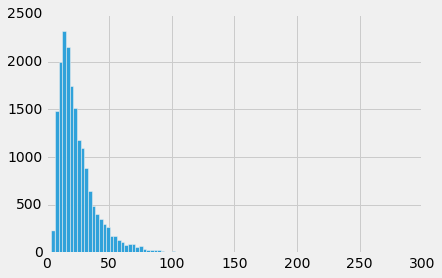

5


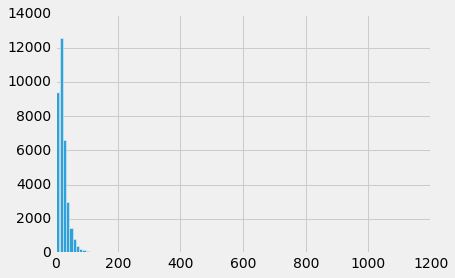

6


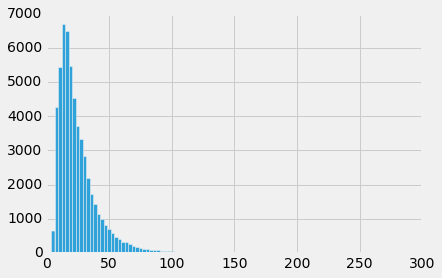

7


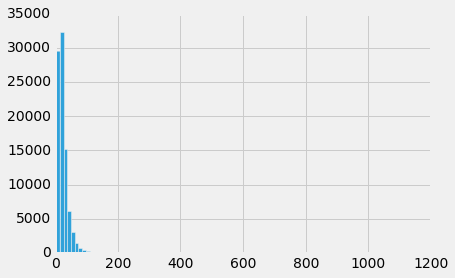

8


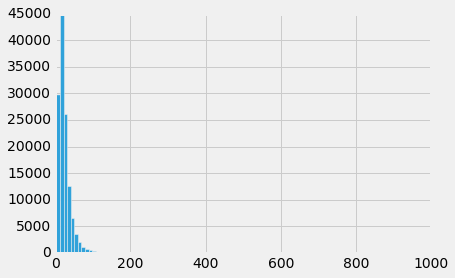

9


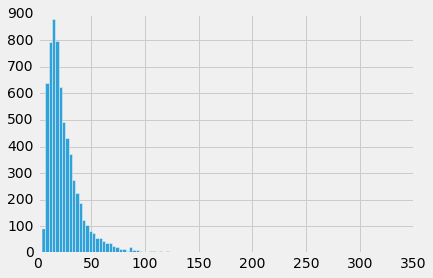

In [46]:
for cls in classes_to_data:
    section_lengths = list(map(lambda x: list(x['sections_gap']), classes_to_data[cls]))
    section_lengths = [item for sublist in section_lengths for item in sublist]
    print(cls)
    plt.hist(section_lengths, 100);
    plt.show()

In [45]:
np.array(section_lengths)

array([ 16.6754 ,  35.58772,  15.38191, ...,  24.67312,  13.23886,
        13.62681])

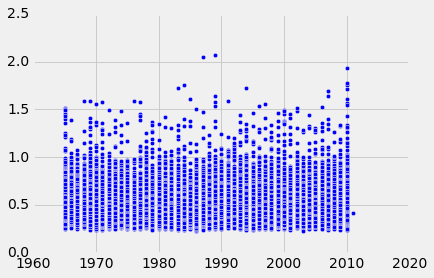

In [128]:
X = list(map(lambda x: x['year'], data))
Y = list(map(lambda x: np.mean(x['beats_gap']), data))
plt.ylim(ymax=2.5)
plt.scatter(X, Y)

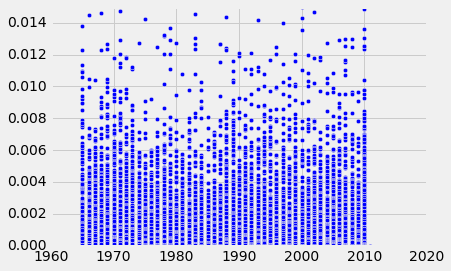

In [129]:
X = list(map(lambda x: x['year'], data))
Y = list(map(lambda x: np.var(x['beats_gap']), data))
plt.ylim(ymax=0.015)
plt.scatter(X, Y)

0.0


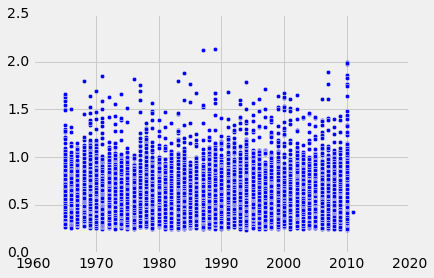

10.0


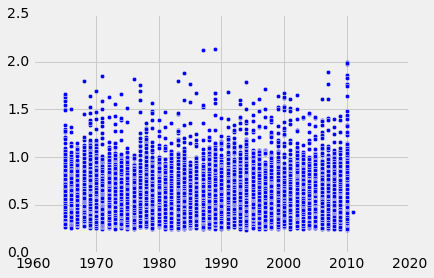

20.0


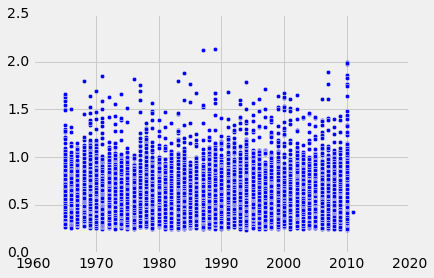

30.0


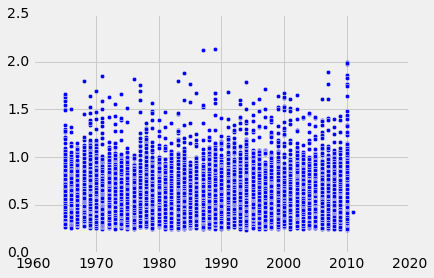

40.0


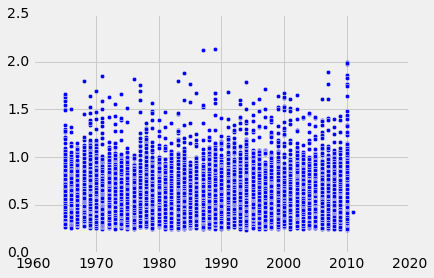

50.0


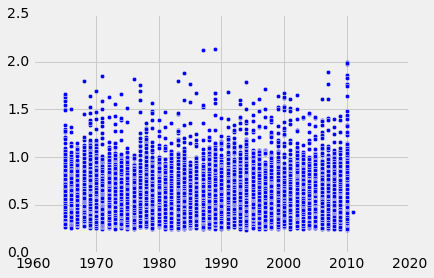

60.0


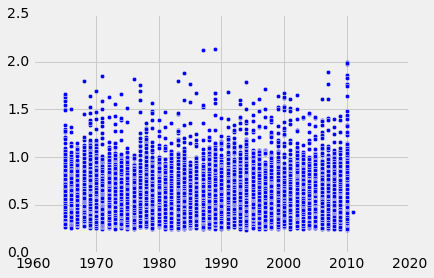

70.0


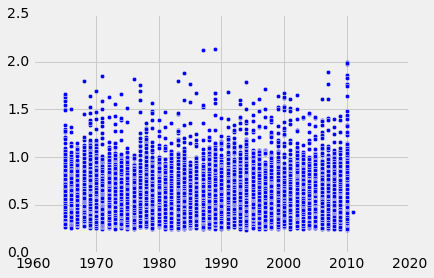

80.0


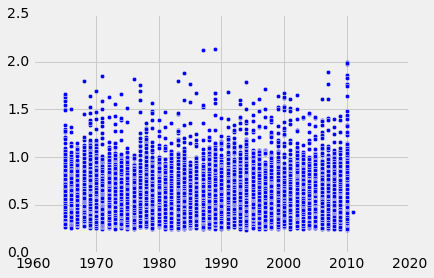

90.0


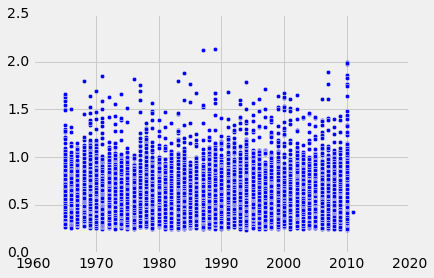

100.0


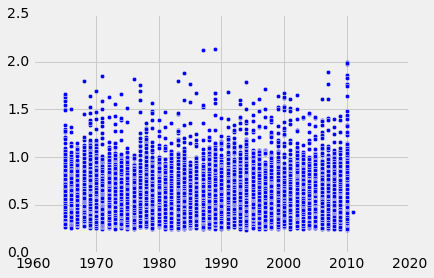

In [130]:
for perc in np.linspace(0,100,11):
    print(perc)
    X = list(map(lambda x: x['year'], data))
    Y = list(map(lambda x: np.percentile(x['beats_gap'], 95), data))
    plt.ylim()
    plt.scatter(X, Y);
    plt.show()